# Piston Problem

Consider the piston problem, 

   <img src="../Figs/Piston-System.png" width="400" />

where the structure is initialized at the center of the tube at $\frac{L}{2}$, 
the fluid fills the left tube. And the cross section of the tube is assumed to be 1, 
and there is no variation in cross setion. Therefore, the problem is one-dimensional.

## Structure Governing Equation

The piston structure is of mass $m_s = 1$, attached to a damper with damping coefficient $c_s$ and a spring with stiffness $k_s$ at $\frac{L}{2}$. The displacement of the piston $u$ is governed by 

$$m_s \ddot{u} + c_s \dot{u} + k_s u = f_{ext} $$



## Fluid Governing Equation
The fluid is governed by the Euler equation

\begin{align*}
\frac{\partial }{\partial t}
\begin{bmatrix}
\rho \\
\rho v\\
E
\end{bmatrix}
+
\frac{\partial }{\partial x}
\begin{bmatrix}
\rho v \\
\rho v^2 + p\\
(E + p)v
\end{bmatrix}
=0
\end{align*}
where $$E = \rho e + \frac{\rho v^2}{2} \qquad e = C_vT \qquad p = \rho R T$$

## Transmission condition

At the fluid structure interface, we have the no penetration condition

$$v(x_p(t)) = \dot {u}$$

and the force equilibrium condition

$$p(x_p(t)) = f_{ext}(t)$$


# Fluid Structure Coupling

The partition approach is applied with embedded/immersed boundary method for the coupled fluid-structure system.

   <img src="../Figs/Partitioned-Algorithm.png" width="400" />

The 2nd order explicit Runge-Kutta scheme is applied for the fluid, and the implicit mid-point rule is applied for the piston.

## Fluid

Assume the computational domain is $[0, L]$ with wall boundary conditions on both ends, 
the piston structure is initially at $\frac{L}{2}$ with prescribed motion $x_p(t)$. The flow is of constant density $\rho_0$, zero velocity $u_0 = 0$, and constant pressure $p_0$. 


### Finite Volume Method
The fluid governing equation is discretized by finite volume method. In the cell $\Omega_i$, we have 

\begin{align*}
\frac{\partial }{\partial t} \int_{\Omega_i}W dV + \int_{\partial \Omega_i} \mathcal{F}(W)\nu_i^F dS = 0
\end{align*}

here $W$ is the coservative state vector, $\mathcal{F}(W)$ is the flux, and  $\nu$ is the outward unit normal. Let denote the cell-averaged fluid state vector $W_i$, we have

\begin{align*}
|\Omega_i|\frac{\partial W_i}{\partial t} + \sum_{j\in \kappa(i)} |\partial \Omega_{ij}| \phi(W_{i},W_{j},\nu_{ij}) = 0
\end{align*}
here $\kappa(i) = \{i - 1, i + 1\}$ and $\phi$ denotes any numerical flux.

### 2nd Order Runge-Kutta Method (from $t_{n}$ to  $t_{n+1}$)


The semi-discretized fluid equation is advanced by the 2nd order Runge-Kutta method. 
- first Runge Kutta step
    $$\widetilde{W}^{n+1} = \widetilde{W}^{n+1} + \frac{\Delta t}{\Delta x} \Phi(W^n, u^{n^p}, \dot u^{n^p}) $$
- second Runge Kutta step
     
     \begin{align*}
      & \textrm{perform phase change for }  \widetilde{W}^{n+1} \textrm{ with structure displacement} (u^{n+1^p}, \dot u^{n+1^p}) \\
      &  W^{n+1} = \frac{1}{2}\Big( W^n + \widetilde{W}^{n+1} + \frac{\Delta t}{\Delta x} \Phi(\widetilde{W}^{n+1}, u^{n+1^p}, \dot u^{n+1^p}) \Big)
      \end{align*}

- perform phase change for ${W}^{n+1}$  with structure displacement  $(u^{n+1^p}, \dot u^{n+1^p})$

## Structure 

The structure is staggered by half time-step for improving the stability. The first half step is advanced:

\begin{align*}
&\ddot u^{\frac{1}{2}} = \frac{f_{ext}^{0} - k_s u^{0} - c_s\dot{u}^0}{m_s}              \\
&\dot u^{\frac{1}{2}}  = \dot u^{0} + \frac{\Delta t}{2} \ddot u^{0}                     \\
&     u^{\frac{1}{2}}  = u^{0} + \frac{\Delta t}{4}(\dot u^{0} + \dot u^{\frac{1}{2}})
\end{align*}

### Mid-point rule (from $t_{n+\frac{1}{2}}$ to  $t_{n+\frac{3}{2}}$)

The structure equation is advanced by the mid-point rule:

$$\begin{align*}
&m_s\ddot{u}^{n+1}  + c_s\dot{u}^{n+1} + k_s u^{n+1} = f_{ext}^{n+1}\\
&\dot{u}^{n+\frac{3}{2}} = \dot{u}^{n+\frac{1}{2}} + \frac{\Delta t}{2}(\ddot{u}^{n+\frac{1}{2}} + \ddot{u}^{n+\frac{3}{2}})\\
&u^{n+\frac{3}{2}} = u^{n+\frac{1}{2}} + \frac{\Delta t}{2}(\dot{u}^{n+\frac{1}{2}} + \dot{u}^{n+\frac{3}{2}}) = u^{n+\frac{1}{2}} + \Delta t\dot{u}^{n+\frac{1}{2}} + \frac{\Delta t^2}{4}(\ddot{u}^{n+\frac{1}{2}} + \ddot{u}^{n+\frac{3}{2}})  \\
&u^{n+1} = \frac{1}{2}(u^{n + \frac{1}{2}} + u^{n + \frac{3}{2}}) \\
&\dot u^{n+1} = \frac{1}{2}(\dot u^{n + \frac{1}{2}} + \dot u^{n + \frac{3}{2}}) \\
&\ddot u^{n+1} = \frac{1}{2}(\ddot u^{n + \frac{1}{2}} + \ddot u^{n + \frac{3}{2}}) \\
\end{align*}$$

We can solve for $\ddot{u}^{n+\frac{3}{2}}$ :

$$\ddot{u}^{n+\frac{3}{2}} = 
\frac{
f_{ext}^{n+1} - \frac{m_s}{2}\ddot{u}^{n+\frac{1}{2}} - \frac{c_s}{2}(2\dot u^{n+\frac{1}{2}} + \frac{\Delta t}{2}\ddot u^{n+\frac{1}{2}}) - \frac{k_s}{2}(2u^{n+\frac{1}{2}} + \Delta t \dot{u}^{n+\frac{1}{2}} + \frac{\Delta t^2}{4} \ddot{u}^{n+\frac{1}{2}})
}{
\frac{m_s}{2} + \frac{c_s}{2}\frac{\Delta t}{2} + \frac{k_s}{2}\frac{\Delta t^2}{4}
} $$

### Prediction for the half step 

\begin{align*}
&u^{n+1^p} = u^{n+\frac{1}{2}} + \frac{1}{2}\Delta t \dot{u}^{n+\frac{1}{2}} + \frac{1}{8}\Delta t( \dot{u}^{n+\frac{1}{2}} -  \dot{u}^{n-\frac{1}{2}})  \\
&{\dot u}^{n+1^p} =  \frac{3}{2}\dot{u}^{n+\frac{1}{2}} -  \frac{1}{2}\dot{u}^{n-\frac{1}{2}} \\
\end{align*}



# Unscented Kalman Inversion

## Forward problem

The fluid is initially at rest, with initial density, velocity, and pressure given by:

   $$ \rho_0 = 1.225, \qquad v_0 = 0, \qquad p_0 = 1.0.$$
   
No-penetration wall boundary condition is imposed on the left end of fluid domain. The tube length is $L = 2$.

As for the structure, the reference properties are  

$$ m_s = 1.0,\qquad c_s = 0.5,\qquad k_s = 2.0.$$

For the forward problem, the computational domain is semi-discretized by a uniform grid with $\Delta x = 5\times10^{-3}$. The explicit 2nd-order Runge-Kutta time integrator is used for the fluid and implicit 2nd-order mid-point rule time integrator is applied for the structure with constant time step $\Delta t = 10^{-3}$. The coupled system is integrated till final time $T = 1$. The rarefaction wave is generated in the flow due to the receding motion of the piston.

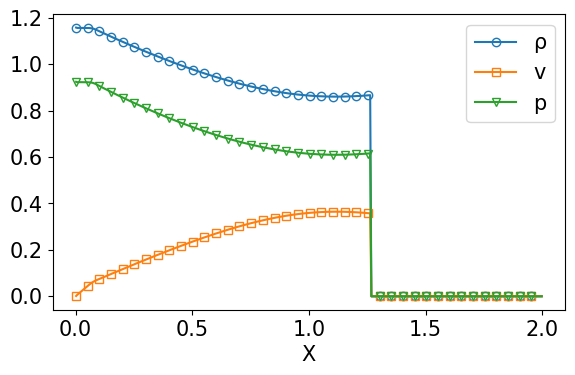

PyObject <matplotlib.legend.Legend object at 0x7f96e9742f10>

In [13]:
include("../Inversion/Plot.jl")
include("FSI.jl")
N, L = 400, 2.0

# flow gas constant, intial density, velocity and pressure
γ, ρ0, v0, p0 = 1.4, 1.225, 0. , 1.0
fluid_info = [γ, ρ0, v0, p0] 

# piston mass, damping coefficient and spring stiffness
ms, cs, ks = 1.0, 0.50, 2.0
θ_ref = [ms; cs; ks]
# initial displacement, velocity, and initial position
u0, v0, x0 = 0.0, 0.0, L/2
structure_info = [ms, cs, ks, u0, v0, x0, "AEROELASTIC", nothing] 

# time step and end time
Δt, T = 0.001, 1.0
N_T = Int64(T/Δt)
obs_freq = 10
time_info = [Δt, T]

fluid, piston, _, piston_history = Solve(L, N, fluid_info, structure_info, time_info; output_freq = 1)

# visualize the fluid variables
PyPlot.figure(figsize=(6,4))
PyPlot.plot(fluid.xx, fluid.V[1, :], "-o", fillstyle = "none", markevery = 10, label="ρ")
PyPlot.plot(fluid.xx, fluid.V[2, :], "-s", fillstyle = "none", markevery = 10, label="v")
PyPlot.plot(fluid.xx, fluid.V[3, :], "-v", fillstyle = "none", markevery = 10, label="p")
PyPlot.xlabel("X")
PyPlot.tight_layout()
PyPlot.legend()

## Inverse problem
For the inverse problem, $\theta = [c_s;\,k_s]$ is calibrated from $N_y=100$ 
piston displacement data collected at every $10^{-2}$ till $T = 1$. 
These observation data are generated with reference parameters $\theta_{ref} = [0.5;\,2]$ and corrupted 
with zero-mean random Gaussian noise with standard deviation $\sigma_{\eta} = 2\times10^{-3}$. 


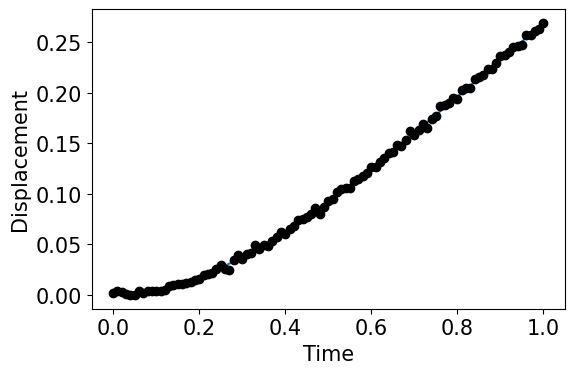

In [15]:
using Random
using Distributions

y_noiseless = piston_history[1, 1:obs_freq:end]

y = copy(y_noiseless)
noise_σ = 0.002
N_y = length(y)
Random.seed!(123);
for i = 1:N_y
    noise = rand(Normal(0, noise_σ))
    y[i] += noise
end
# visualize the observation
PyPlot.figure(figsize=(6,4))
tt = Array(LinRange(0, T, N_T+1))
PyPlot.plot(tt, piston_history[1, :])
PyPlot.plot(tt[1:obs_freq:end], y, "o", color="black")
PyPlot.xlabel("Time")
PyPlot.ylabel("Displacement")
PyPlot.tight_layout()

## Unscented Kalman Inversion

The UKI is initialized with $\theta_0 \sim \mathcal{N}(1, I)$. The estimated parameters and associated 2-$\sigma$ confidence intervals for each component at each iteration are depicted.

┌ Info: ("optimization error at iter 1 = ", 698.8932428420688)
└ @ Main /Users/huang/Desktop/Code/InverseProblems-master.jl/Inversion/UKI.jl:302
┌ Info: ("Frobenius norm of the covariance at iter 1 = ", 1.4142135623730951)
└ @ Main /Users/huang/Desktop/Code/InverseProblems-master.jl/Inversion/UKI.jl:303
┌ Info: ("optimization error at iter 2 = ", 313.25980389665574)
└ @ Main /Users/huang/Desktop/Code/InverseProblems-master.jl/Inversion/UKI.jl:302
┌ Info: ("Frobenius norm of the covariance at iter 2 = ", 1.2979415979034374)
└ @ Main /Users/huang/Desktop/Code/InverseProblems-master.jl/Inversion/UKI.jl:303
┌ Info: ("optimization error at iter 3 = ", 62.95911048432758)
└ @ Main /Users/huang/Desktop/Code/InverseProblems-master.jl/Inversion/UKI.jl:302
┌ Info: ("Frobenius norm of the covariance at iter 3 = ", 0.07021002630107319)
└ @ Main /Users/huang/Desktop/Code/InverseProblems-master.jl/Inversion/UKI.jl:303
┌ Info: ("optimization error at iter 4 = ", 62.535494366304505)
└ @ Main /Users/hua

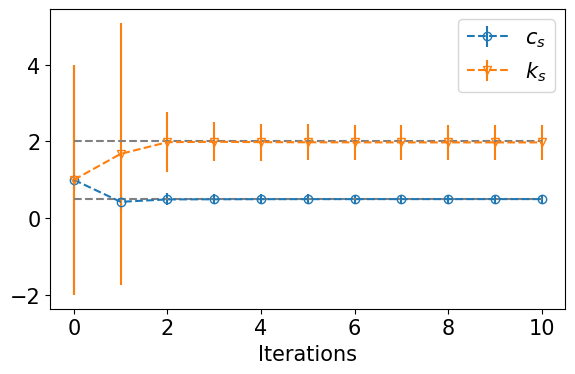

┌ Info: ("optimization error at iter 10 = ", 62.52654307061629)
└ @ Main /Users/huang/Desktop/Code/InverseProblems-master.jl/Inversion/UKI.jl:302
┌ Info: ("Frobenius norm of the covariance at iter 10 = ", 0.024766189031557646)
└ @ Main /Users/huang/Desktop/Code/InverseProblems-master.jl/Inversion/UKI.jl:303
┌ Info: ("Final mean: ", [0.4990058693746447, 1.9740594161900575])
└ @ Main In[18]:37
┌ Info: ("Final cov: ", [0.0015604547957409312 -0.005929693054978381; -0.005929693054978383 0.023214675069878402])
└ @ Main In[18]:38


In [18]:
include("../Inversion/KalmanInversion.jl")
s_param = Setup_Param(L, N,  time_info, fluid_info,  θ_ref, ["cs", "ks"], obs_freq)

N_y, N_θ = s_param.N_y, s_param.N_θ

Σ_η = Array(Diagonal(fill(noise_σ^2, N_y)))


# UKI 
θ0_mean =  ones(Float64, N_θ) # [0.5; 2.0] # 
θθ0_cov = Array(Diagonal(fill(1.0^2.0, N_θ)))
N_iter = 10
α_reg = 1.0
update_freq = 1
ukiobj = UKI_Run(s_param, forward, θ0_mean, θθ0_cov, y, Σ_η, α_reg, update_freq, N_iter)

θ_mean_arr = hcat(ukiobj.θ_mean...)
θθ_std_arr = zeros(Float64, (N_θ, N_iter+1))
for i = 1:N_iter+1
    for j = 1:N_θ
        θθ_std_arr[j, i] = sqrt(ukiobj.θθ_cov[i][j,j])
    end
end

PyPlot.figure(figsize=(6,4))
ites = Array(LinRange(0, N_iter, N_iter+1))
PyPlot.errorbar(ites, θ_mean_arr[1,:], fmt="--o",fillstyle="none", yerr=3θθ_std_arr[1,:],  label=L"c_s")
PyPlot.plot(ites, fill(cs, N_iter+1), "--", color="grey")

PyPlot.errorbar(ites, θ_mean_arr[2,:], fmt="--v", fillstyle="none", yerr=3θθ_std_arr[2,:], label=L"k_s")
PyPlot.plot(ites, fill(ks, N_iter+1), "--", color="grey")
PyPlot.legend()

PyPlot.xlabel("Iterations")
PyPlot.tight_layout()

@info "Final mean: ", ukiobj.θ_mean[end]
@info "Final cov: ", ukiobj.θθ_cov[end]

Compare the posterior distribution with MCMC (⚠️ Takes several hours)

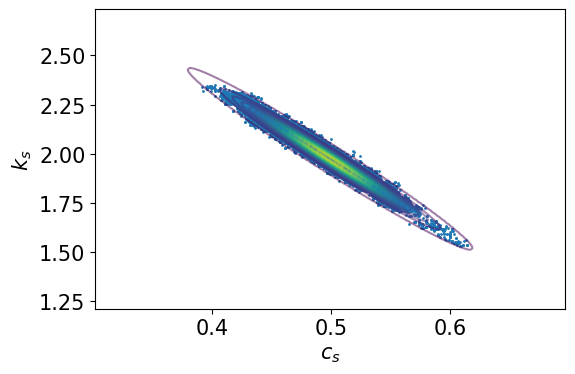

PyObject <matplotlib.collections.PathCollection object at 0x7f9709141d60>

In [20]:
using NPZ
include("../Inversion/RWMCMC.jl")
# compute posterior distribution by MCMC
μ0 , Σ0 = [cs; ks], Array(Diagonal(fill(1.0^2.0, N_θ)))
logρ(θ) = log_bayesian_posterior(s_param, θ, forward, y, Σ_η, μ0, Σ0)
step_length = 0.01
N_iter , n_burn_in= 50000, 10000

us = RWMCMC_Run(logρ, μ0, step_length, N_iter)
npzwrite("us.npy", us)

# us = npzread("us.npy")

# plot UKI results at 5th, 10th, and 15th iterations
PyPlot.figure(figsize=(6,4))
Nx = 100; Ny = 200
uki_θ_mean = ukiobj.θ_mean[end]
uki_θθ_cov = ukiobj.θθ_cov[end]
X,Y,Z = Gaussian_2d(uki_θ_mean, uki_θθ_cov, Nx, Ny)
PyPlot.contour(X, Y, Z, Array(LinRange(minimum(Z)+0.01*maximum(Z), maximum(Z), 20)), alpha=0.5)
PyPlot.xlabel(L"c_s")
PyPlot.ylabel(L"k_s")
PyPlot.tight_layout()
# plot MCMC results 
everymarker = 1
PyPlot.scatter(us[n_burn_in:everymarker:end, 1], us[n_burn_in:everymarker:end, 2], s = 1)